# Estimación de parámetros en redes Bayesianas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Hey_Machine_Learning_Logo.png" width="400px" height="400px" />

> Hasta este momento hemos supuesto que ya conocemos nuestro modelo gráfico (incluyendo estructura y parámetros). Sin embargo, como deben sospechar, este no es el caso en problemas reales.
>
> Una manera de obtener un modelo gráfico es extraer tanto la red como los parámetros con la ayuda de un experto. Esta es una tarea no menor, y puede requerir muchísimo trabajo (semanas, quizá meses, dependiendo del tamaño de la red). Además, el acceso exhaustivo a un experto, puede no ser una suposición plausible.
>
> Por otra parte, es una suposición más común tener acceso a un conjunto de datos generados por la distribución (situación) que queremos modelar. Así, en esta clase nos enfocaremos en construir un modelo a partir de un conjunto de datos.

> **Objetivos:**
> - Describir el problema de aprendizaje de modelos.
> - Obtener los parámetros de máxima verosimilitud para redes Bayesianas.
> - Obtener los parámetros MAP para redes Bayesianas.

> **Referencias:**
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 17.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Ch. 5.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/d/d5/Hey_Machine_Learning_Logo.png.</p>

___

## 1. Introducción al aprendizaje de modelos gráficos

El proceso completo de aprendizaje puede ser resumido con el siguiente diagrama:

In [1]:
from IPython.display import Image

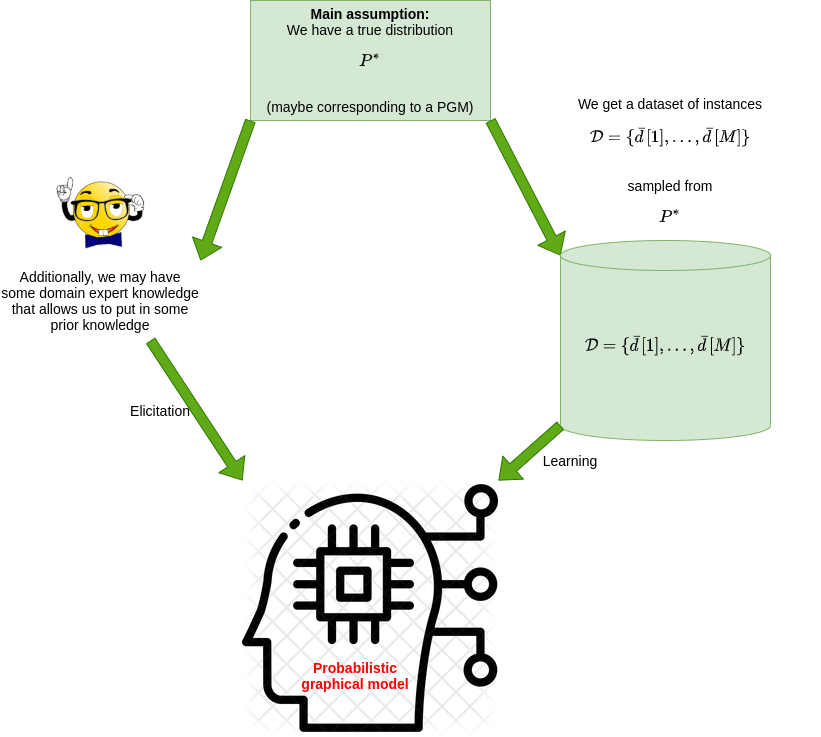

In [2]:
Image("figures/pgm_construction.png")

### ¿Por qué quisieramos aprender un modelo gráfico?

#### 1. Para responder preguntas desde una perspectiva probabilística al rededor de nuevas observaciones.

¿Qué optimizaremos? **Verosimilitud de datos de entrenamiento**

$$P(\mathcal{D} | \mathcal{M}).$$

- Si un modelo hace que los datos sean más probables, entonces es plausible que los datos provengan de dicho modelo.

Por otra parte, nos interesa evaluar este modelo sobre datos nuevos, no sobre datos que ya hayamos visto.

- De manera que evaluamos el modelo sobre un conjunto separado de pruebas: **Verosimilitud de datos de prueba**
  
  $$P(\mathcal{D}' | \mathcal{M}).$$

#### 2. Para realizar una tarea de predicción específica sobre nuevas instancias.

En este sentido, queremos predecir variables objetivo $\bar{y}$ a partir de ciertas variables observadas $\bar{x}$.

¿Qué optimizamos? Un objetivo especializado: **recall, f1, ...**

- Sin embargo, desde un punto de vista matemático y algorítmico, nos conviene optimizar la verosimilitud de datos de entrenamiento:
  
  $$P(\mathcal{D} | \mathcal{M}) = \prod_{m} P(\bar{y}[m] | \bar{x}[m] : \mathcal{M}).$$
  
Finalmente, el modelo debe ser evaluado sobre los **datos de prueba** y el **objetivo original especializado**.

#### 3. Para descubrir conocimiento acerca de $\mathcal{M}^*$.

En este caso, quisiéramos:

- Entender dependencias directas entre variables (arcos).
- Aprender la direccionalidad de los arcos.
  
¿Qué optimizaremos? **Verosimilitud de datos de entrenamiento**

- Muy conveniente matemáticamente, pero...
- Mala representación de precisión estructural.

### ¿Cómo prevenimos el overfitting?

1. Si seleccionamos el modelo $\mathcal{M}$ optimizando de acuerdo a la verosimilitud de entrenamiento, es bastante probable que caigamos en sobreajustar al ruido.

2. En parámetros:
   - Los parámetros se ajustarán a la incertidumbre de los datos de entrenamiento.
   - Solución: usar regularización, o equivalentemente, previas sobre los parámetros.

3. En la estructura:
   - Verosimilitud de entrenamiento siempre beneficia a las estructuras más complejas.
   - Solución: penalizar la complejidad del modelo.

___
## 2. Parámetros de máxima verosimilitud en redes Bayesianas

<font color=red>**Recordar parámetros de máxima verosimilitud en distribuciones multinomiales**</font>

Apliquemos el principio de máxima verosimilitud para estimar los parámetros en una red Bayesiana.

Supongamos que tenemos un conjunto de muestras iid de la red Bayesiana $X \to Y$:

$$\mathcal{D} = \{(x[1], y[1]), (x[2], y[2]), \dots, (x[M], y[M])\}$$

Podemos dar una interpretación a estas muestras:

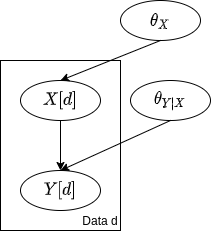

In [3]:
Image("figures/iid_bn.png")

Entonces, tenemos los parámetros de la cpd de $X$, que denotamos como $\theta_X$, y los parámetros de la cpd de $Y$, que denotamos como $\theta_{Y|X}$. Denotaremos a todos los parámetros como $\theta$.

La función de verosimilitud es (<font color = red>ver en el pizarrón</font>):


$$
\begin{align}
\mathcal{L}(\Theta : \mathcal{D}) & = \prod_{d=1}^{M} P(x[d], y[d] | \Theta) \\
                                  & = \prod_{d=1}^{M} P(x[d] | \Theta) P(y[d] | x[d], \Theta) \\
                                  & = \left(\prod_{d=1}^{M} P(x[d] | \Theta)\right) \left(\prod_{d=1}^{M} P(y[d] | x[d], \Theta)\right) \\
                                  & = \underbrace{\left(\prod_{d=1}^{M} P(x[d] | \theta_X)\right)}_{\text{local likelihood}} \underbrace{\left(\prod_{d=1}^{M} P(y[d] | x[d], \theta_{Y|X})\right)}_{\text{local likelihood}}
\end{align}
$$


Esto se puede generalizar a redes Bayesianas en general:


$$
\begin{align}
\mathcal{L}(\Theta : \mathcal{D}) & = \prod_{d=1}^{M} P(\bar{x}[d] | \Theta) \\
                                  & = \prod_{d=1}^{M} \prod_{i=1}^{n} P(x_i[d] | \mathrm{Pa}x_i[d], \Theta)  \\
                                  & = \prod_{i=1}^{n} \underbrace{\prod_{d=1}^{M} P(x_i[d] | \mathrm{Pa}x_i[d], \theta_{X_i|\mathrm{Pa}X_i})}_{\text{local likelihood } \mathcal{L}_i(\theta_{X_i|\mathrm{Pa}X_i} : \mathcal{D})}  \\
                                  & = \prod_{i=1}^{n} \mathcal{L}_i(\theta_{X_i|\mathrm{Pa}X_i} : \mathcal{D})
\end{align}
$$


Entonces, si los parámetros $\theta_{X_i|\mathrm{Pa}X_i}$ son disjuntos, entonces, las estimaciones de máxima verosimilitud se pueden llevar a cabo por separado.

### Estimadores de máxima verosimilitud para CPDs tabulares

Usando lo anterior y considerando $\bar{U}=\mathrm{Pa}X$, la verosimilitud de los datos es:

$$
\begin{align}
\prod_{d=1}^{M} P(x[d] | \bar{u}[d], \theta_{X|\bar{U}}) & = \prod_{x \in \mathrm{Val}(X),\bar{u} \in \mathrm{Val}(U)} \prod_{d: x[d]=x, \bar{u}[d]=\bar{u}} \underbrace{P(x[d] | \bar{u}[d], \theta_{X|\bar{U}})}_{\theta_{x|\bar{u}}} \\
& = \prod_{x \in \mathrm{Val}(X),\bar{u} \in \mathrm{Val}(U)} \theta_{x | \bar{u}}^{M(x,\bar{u})},
\end{align}
$$

donde $M(x,\bar{u})$ es el número de veces que la muestra $d$ es consistente con $x, \bar{u}$.

Aplicando el mismo principio que con distribuciones multinomiales:

$$\hat{\theta}_{x|\bar{u}} = \frac{M(x,\bar{u})}{\sum_{x'} M(x',\bar{u})} = \frac{M(x,\bar{u})}{M(\bar{u})},$$

el estimador de máxima verosimilitud corresponde a la cantidad de muestras consistentes con $x,\bar{u}$ entre el la cantidad de muestras consistentes con $\bar{u}$.

### Ejemplo: Clasificador Naive Bayes para dataset de vino

In [4]:
# Importar BayesianNetwork, pyplot, seaborn, pandas
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Lectura de datos
wine_data = pd.read_csv("winequality-red.csv", sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine_data.shape

(1599, 12)

<Axes: >

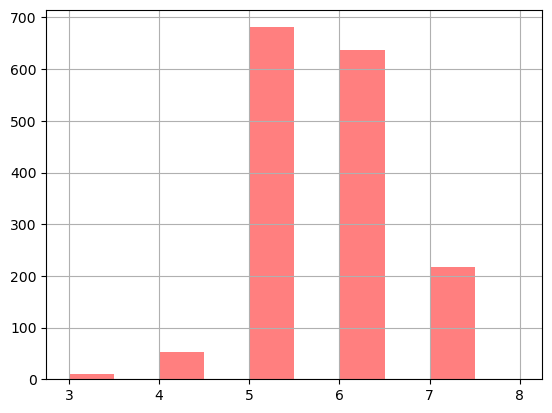

In [8]:
# Histograma de la variable objetivo
wine_data["quality"].hist(bins=5, color="red", alpha=0.5, width=0.5)

In [9]:
# Target
target = "quality"  # Variable objetivo
# Independent variables
variables = [col for col in wine_data.columns if col != target]
variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
# pandas qcut
pd.qcut?

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

In [11]:
# Quantización de variables numéricas
quantiles = 10
for col in variables:
    wine_data[col] = pd.qcut(wine_data[col], q=quantiles, labels=range(1, 11))
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4,9,1,3,4,4,5,8,9,3,2,5
1,5,10,1,8,9,9,8,6,3,7,4,5
2,5,10,2,6,8,6,7,6,4,6,4,5
3,10,1,10,3,4,7,8,8,2,4,4,6
4,4,9,1,3,4,4,5,8,9,3,2,5


In [13]:
# Red Bayesiana
wine_model_naive = BayesianNetwork([
    (target, col) for col in variables
])

<Axes: >

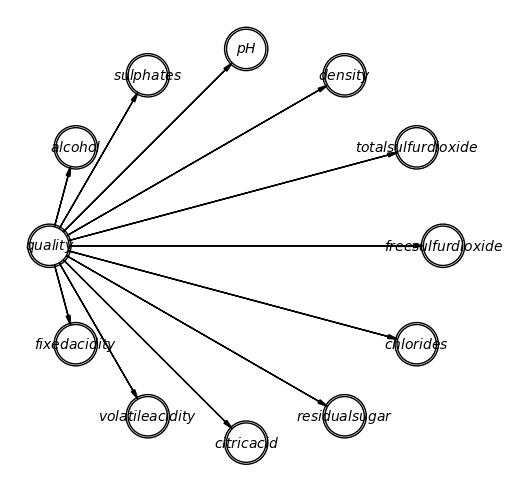

In [43]:
# Dibujar red con daft
model_plot = wine_model_naive.to_daft(
    node_pos="shell",
    pgm_params={"observed_style": "outer", "grid_unit": 5}
)
model_plot.render()

In [21]:
# Train y test
train = wine_data.sample(frac=0.8, random_state=42)
test = wine_data.drop(train.index)
train.shape, test.shape

((1279, 12), (320, 12))

In [22]:
# Entrenamos
wine_model_naive.fit(train)

In [23]:
# CPDs estimadas -- target
print(wine_model_naive.get_cpds(target))

+------------+------------+
| quality(3) | 0.00547303 |
+------------+------------+
| quality(4) | 0.03362    |
+------------+------------+
| quality(5) | 0.433151   |
+------------+------------+
| quality(6) | 0.388585   |
+------------+------------+
| quality(7) | 0.12588    |
+------------+------------+
| quality(8) | 0.0132916  |
+------------+------------+


In [25]:
# train value counts -- target
train[target].value_counts(normalize=True).sort_index()

quality
3    0.005473
4    0.033620
5    0.433151
6    0.388585
7    0.125880
8    0.013292
Name: proportion, dtype: float64

In [26]:
# CPDs estimadas -- alcohol | target
print(wine_model_naive.get_cpds("alcohol"))

+-------------+---------------------+-----+----------------------+
| quality     | quality(3)          | ... | quality(8)           |
+-------------+---------------------+-----+----------------------+
| alcohol(1)  | 0.14285714285714285 | ... | 0.0                  |
+-------------+---------------------+-----+----------------------+
| alcohol(2)  | 0.0                 | ... | 0.0                  |
+-------------+---------------------+-----+----------------------+
| alcohol(3)  | 0.0                 | ... | 0.0                  |
+-------------+---------------------+-----+----------------------+
| alcohol(4)  | 0.2857142857142857  | ... | 0.058823529411764705 |
+-------------+---------------------+-----+----------------------+
| alcohol(5)  | 0.14285714285714285 | ... | 0.058823529411764705 |
+-------------+---------------------+-----+----------------------+
| alcohol(6)  | 0.0                 | ... | 0.0                  |
+-------------+---------------------+-----+-------------------

In [28]:
pd.DataFrame(
    data=wine_model_naive.get_cpds("alcohol").values,
    columns=[f"{target}_{i}" for i in range(3, 9)],
    index=[f"alcohol_{i}" for i in range(1, 11)]
)

,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
alcohol_1,0.142857,0.209302,0.184116,0.112676,0.012422,0.000000
alcohol_2,0.000000,0.023256,0.263538,0.106640,0.006211,0.000000
alcohol_3,0.000000,0.116279,0.054152,0.030181,0.000000,0.000000
alcohol_4,0.285714,0.116279,0.146209,0.094567,0.037267,0.058824
alcohol_5,0.142857,0.093023,0.106498,0.098592,0.074534,0.058824
alcohol_6,0.000000,0.069767,0.084838,0.098592,0.055901,0.000000
alcohol_7,0.285714,0.069767,0.054152,0.118712,0.111801,0.000000
alcohol_8,0.142857,0.139535,0.055957,0.104628,0.186335,0.176471
alcohol_9,0.000000,0.139535,0.032491,0.150905,0.248447,0.235294
alcohol_10,0.000000,0.023256,0.018051,0.084507,0.267081,0.470588


In [33]:
# Evaluación
test["pred"] = wine_model_naive.predict(test[variables]).values.reshape(-1,)
test

  0%|          | 0/307 [00:00<?, ?it/s]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pred
1,5,10,1,8,9,9,8,6,3,7,4,5,5
8,5,7,2,3,4,3,2,6,7,4,2,7,5
13,5,7,6,1,10,3,4,7,4,10,1,5,5
14,7,8,4,10,10,10,10,9,2,10,1,5,5
20,7,1,9,2,5,9,8,6,8,2,2,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,5,4,3,1,6,5,1,9,4,9,6,6
1570,1,2,10,5,10,7,5,1,7,10,10,6,7
1573,1,7,4,7,4,6,7,2,10,7,10,6,6
1583,1,4,6,4,4,10,10,3,6,5,4,5,5


Text(0.5, 1.0, 'Confusion Matrix')

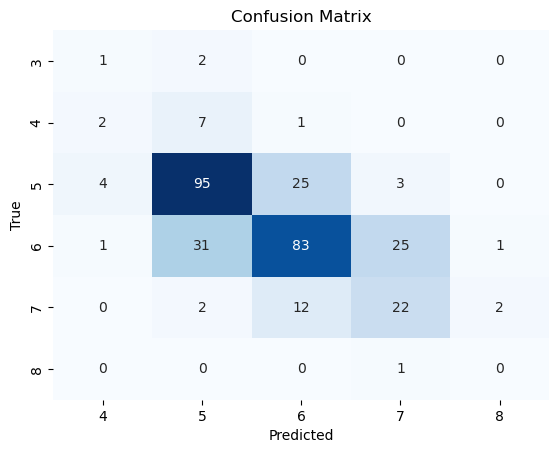

In [34]:
# Matriz de confusión
sns.heatmap(
    pd.crosstab(test[target], test["pred"], rownames=["True"], colnames=["Predicted"]),
    annot=True, fmt="d", cmap="Blues", cbar=False
)
plt.title("Confusion Matrix")

In [35]:
# Accuracy
(test["pred"] == test[target]).mean()

0.63125

### Fragmentación y overfitting

Tenemos que:

$$\hat{\theta}_{x|\bar{u}} = \frac{M(x,\bar{u})}{\sum_{x'} M(x',\bar{u})} = \frac{M(x,\bar{u})}{M(\bar{u})}.$$

- Notamos que el número de posibles asignaciones para $x, \bar{u}$ crece exponencialmente con el tamaño de $|\bar{U}|$.

- De forma que, si $X$ tiene muchos nodos padres, habrá pocas instancias de $x, \bar{u}$.

- Esto nos conllevará a estimadores muy pobres de $\hat{\theta}_{x|\bar{u}}$

Este fenómeno se llama **fragmentación**.

Por tanto, cuando el conjunto de datos es limitado, es común obtener mejor generalización usando estructuras más simples **incluso cuando no son correctas**.

___
## 3. Parámetros MAP en redes Bayesianas

El problema principal de máxima verosimilitud es su tendencia al overfitting en escenarios con datos limitados.

- Supongamos que tiramos una moneda 10 veces, y resulta que cae $x^1$ 7 de las 10 tiradas. Entonces,

  $$\hat{\theta}_{MLE} = 0.7$$
  
- Supongamos que tiramos una moneda 1000 veces, y resulta que cae $x^1$ 700 de las 1000 tiradas. Entonces,

  $$\hat{\theta}_{MLE} = 0.7$$

El estimador del segundo escenario es mucho más plausible que en el primero. Sin embargo, el principio de máxima verosimilitud no distingue entre ambos.

**Paradigma Bayesiano:** Si tenemos incertidumbre de algo, entonces deberíamos tratar ese algo como variable aleatoria, sobre la cual tenemos una distribución, la cual actualizamos en el tiempo en tanto adquirimos más datos.

Bajo este paradigma, los parámetros $\theta$ serán variables aleatorias.

- Dado $\theta$, los tiros son independientes.

- Si  $\theta$ es desconocido, entonces los tiros no son independientes:
  - Cada tiro nos dice algo acerca de $\theta$.

#### En una distribución multinomial

Probabilidad conjunta:

$$
\begin{align}
P(x[1], \dots, x[M], \theta) & = P(x[1], \dots, x[M] | \theta) P(\theta) \\
                             & = P(\theta) \underbrace{\prod_{d=1}^{M} P(x[d] | \theta)}_{\text{likelihood function}} \\
                             & = P(\theta)\prod_{i=1}^{k} \theta_k^{M_i}.
\end{align}
$$

Distribución posterior:

$$
\begin{align}
P(\theta | x[1], \dots, x[M]) & = \frac{P(x[1], \dots, x[M], \theta)}{P(x[1], \dots, x[M])} \\
                              & \propto P(x[1], \dots, x[M], \theta) \\
                              & = P(\theta)\prod_{i=1}^{k} \theta_k^{M_i}
\end{align}
$$

### Previa: Distribution de Dirichlet (generalización de la distribución Beta)

Si $X$ es una distribución multinomial sobre $k$ valores, una buena suposición para la distribución de los parámetros $\bar{\theta} = [\theta_1, \dots, \theta_k]$ es la [**distribución de Dirichlet**](https://en.wikipedia.org/wiki/Dirichlet_distribution).

$\bar{\theta} \sim \mathrm{Dir}(\bar{\alpha})$, donde $\bar{\alpha}=[\alpha_1, \dots, \alpha_k]$,  si

$$P(\bar{\theta}; \bar{\alpha}) = \frac{1}{Z} \prod_{i=1}^{k} \theta_i^{\alpha_i - 1},$$

donde $\sum_{i=1}^{k}\theta_i=1$ y,

$$Z = \frac{\prod_{i=1}^{k} \Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^{k}\alpha_i)},$$

donde $\Gamma(x)= \int_{0}^{\infty}t^{x-1}e^{-t} \mathrm{d}t$ es una extensión continua del factorial.

1. Media
  
   $$
   \mathbb{E}[\theta_k] = \frac{\alpha_k}{\sum_{j=1}^{k}\alpha_j}
   $$
   
2. Moda
     
   $$
   \text{Mode}[\theta_k] = \frac{\alpha_k - 1}{\sum_{j=1}^{k}\alpha_j - K}
   $$

3. Varianza
   
   $$
   \text{Var}[\theta_k] = \frac{\alpha_k (\alpha_0 - \alpha_k)}{\alpha_0^2 (\alpha_0 + 1)}
   $$
   
4. Covarianza
   
   $$
   \text{Cov}[\theta_k, \theta_j] = \frac{- \alpha_k \alpha_j}{\alpha_0^2 (\alpha_0 + 1)}, \qquad \text{para } j\neq k
   $$

- Intuitivamente, los hiperparámetros $\alpha_i$ corresponden al número de muestras con valor $i$ que hemos visto anteriormente.

In [ ]:
# Distribución beta en scipy.stats


In [ ]:
# Instanciamos varias distribuciones beta


In [ ]:
# Graficamos


### Con la previa de Dirichlet, ¿Cómo es la posterior?

- La función de verosimilitud es: $P(\mathcal{D} | \bar{\theta}) = \prod_{i=1}^{k} \theta_i^{M_i}$.

- La previa es: $P(\bar{\theta}) \propto \prod_{i=1}^{k} \theta_i^{\alpha_i - 1}$

Entonces,

$$
P(\bar{\theta} | \mathcal{D}) \propto \prod_{i=1}^{k} \theta_i^{\alpha_i + M_i - 1}.
$$

Esto es, una distribución de Dirichlet $(\bar{\theta} | \mathcal{D}) \sim \mathrm{Dir}(\alpha_1 + M_1, \dots, \alpha_k + M_k)$.

### En este sentido ...

Antes de ver los datos:

$$P(X=x^i | \theta) = \frac{\alpha_i}{\sum_{j=1}^{k}\alpha_j} = \frac{\alpha_i}{\alpha}.$$

Después de ver los datos:

$$P(X[M+1]=x^i | \theta, x[1], \dots, x[M]) = \frac{\alpha_i + M_i}{\alpha + M}.$$


- EL término $\alpha=\sum_{j=1}^{k}\alpha_j$ se conoce como **equivalent sample size**.
  - Un $\alpha$ más grande significa que tenemos más certeza de nuestra previa.

### ¿Cuál es el efecto?

In [36]:
import numpy as np

In [37]:
help(np.random.choice)

Help on method choice in module numpy.random.mtrand:

choice(a, size=None, replace=True, p=None) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or withou

In [38]:
# Generate random numbers form a Bernoulli distribution
theta_true = 0.7
M = 200
D = np.random.choice(a=[0, 1], size=M, p=[1 - theta_true, theta_true])

In [39]:
# Obtain MLE estimation at each step
theta_mle = D.cumsum() / np.arange(1, M + 1)

In [40]:
# Obtain Bayesian estimation for different values of alpha
alpha = [1, 5, 10]
theta_map = np.zeros((M, len(alpha)))
for i, a in enumerate(alpha):
    theta_map[:, i] = (D.cumsum() + a) / (np.arange(1, M + 1) + a + a)

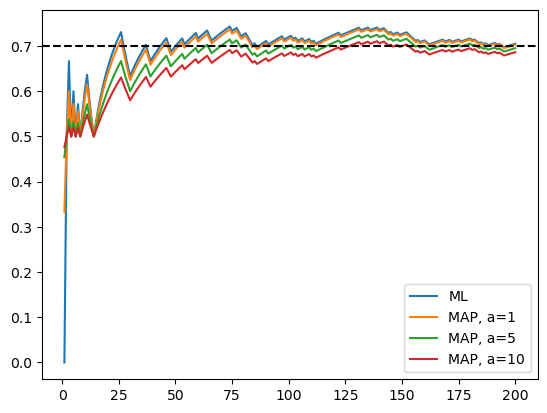

In [41]:
# Plot
plt.plot(range(1, M + 1), theta_mle, label="ML")
plt.plot(range(1, M + 1), theta_map[:, 0], label=f"MAP, a={alpha[0]}")
plt.plot(range(1, M + 1), theta_map[:, 1], label=f"MAP, a={alpha[1]}")
plt.plot(range(1, M + 1), theta_map[:, 2], label=f"MAP, a={alpha[2]}")
plt.legend()
plt.axhline(theta_true, c='k', ls='--')

- Estimadores MAP son menos sensibles al ruido en los datos.

- Estimador MAP $\to$ estimador de máxima verosimilitud cuando el número de muestras $\to \infty$.

**Así como extendimos las ideas de máxima verosimilitud de una distribución multinomial a redes Bayesianas, similarmente sucede con estimadores MAP.**

Todos los detalles en *Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 17.*

### Ejemplo: Clasificador Naive Bayes para dataset de vino

<Axes: >

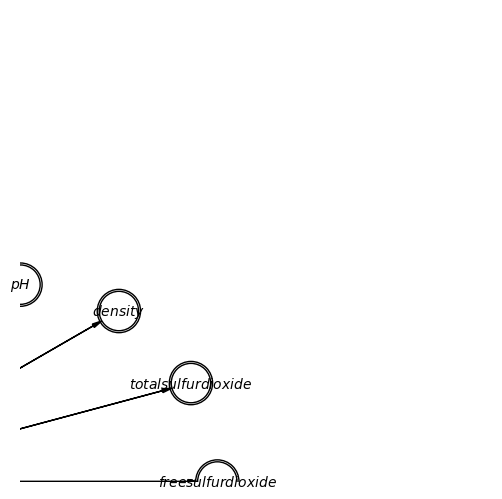

In [44]:
# Dibujamos de nuevo el modelo
model_plot.render()

In [45]:
from pgmpy.estimators import BayesianEstimator

In [46]:
help(BayesianEstimator)

Help on class BayesianEstimator in module pgmpy.estimators.BayesianEstimator:

class BayesianEstimator(pgmpy.estimators.base.ParameterEstimator)
 |  BayesianEstimator(model, data, **kwargs)
 |  
 |  Class used to compute parameters for a model using Bayesian Parameter Estimation.
 |  See `MaximumLikelihoodEstimator` for constructor parameters.
 |  
 |  Method resolution order:
 |      BayesianEstimator
 |      pgmpy.estimators.base.ParameterEstimator
 |      pgmpy.estimators.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model, data, **kwargs)
 |      Base class for parameter estimators in pgmpy.
 |      
 |      Parameters
 |      ----------
 |      model: pgmpy.models.BayesianNetwork or pgmpy.models.MarkovNetwork or pgmpy.models.NoisyOrModel model
 |          for which parameter estimation is to be done.
 |      
 |      data: pandas DataFrame object
 |          dataframe object with column names identical to the variable names of th

In [47]:
# Instanciamos estimador bayesiano
estimator = BayesianEstimator(
    model=wine_model_naive,
    data=train,
)

In [49]:
# Estimar CPDs con previa de Dirichlet
cpd_quality = estimator.estimate_cpd(
    node=target,
    prior_type="dirichlet",
    pseudo_counts=10 * np.ones((train[target].nunique(), 1))
)
print(cpd_quality)

+------------+-----------+
| quality(3) | 0.012696  |
+------------+-----------+
| quality(4) | 0.0395818 |
+------------+-----------+
| quality(5) | 0.42121   |
+------------+-----------+
| quality(6) | 0.378641  |
+------------+-----------+
| quality(7) | 0.127707  |
+------------+-----------+
| quality(8) | 0.0201643 |
+------------+-----------+


In [50]:
print(wine_model_naive.get_cpds(target))

+------------+------------+
| quality(3) | 0.00547303 |
+------------+------------+
| quality(4) | 0.03362    |
+------------+------------+
| quality(5) | 0.433151   |
+------------+------------+
| quality(6) | 0.388585   |
+------------+------------+
| quality(7) | 0.12588    |
+------------+------------+
| quality(8) | 0.0132916  |
+------------+------------+


In [51]:
cpd_cols = {}
for col in variables:
    cpd_cols[col] = estimator.estimate_cpd(
        node=col,
        prior_type="dirichlet",
        pseudo_counts=10 * np.ones((train[col].nunique(), train[target].nunique()))
    )
print(cpd_cols[col])

+-------------+---------------------+-----+---------------------+
| quality     | quality(3)          | ... | quality(8)          |
+-------------+---------------------+-----+---------------------+
| alcohol(1)  | 0.102803738317757   | ... | 0.08547008547008547 |
+-------------+---------------------+-----+---------------------+
| alcohol(2)  | 0.09345794392523364 | ... | 0.08547008547008547 |
+-------------+---------------------+-----+---------------------+
| alcohol(3)  | 0.09345794392523364 | ... | 0.08547008547008547 |
+-------------+---------------------+-----+---------------------+
| alcohol(4)  | 0.11214953271028037 | ... | 0.09401709401709402 |
+-------------+---------------------+-----+---------------------+
| alcohol(5)  | 0.102803738317757   | ... | 0.09401709401709402 |
+-------------+---------------------+-----+---------------------+
| alcohol(6)  | 0.09345794392523364 | ... | 0.08547008547008547 |
+-------------+---------------------+-----+---------------------+
| alcohol(

In [52]:
# Añadimos CPDs
wine_model_naive.add_cpds(cpd_quality, *cpd_cols.values())
wine_model_naive.check_model()

True

In [53]:
# Evaluación
test["pred_"] = wine_model_naive.predict(test[variables]).values.reshape(-1,)
test

  0%|          | 0/307 [00:00<?, ?it/s]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pred,pred_
1,5,10,1,8,9,9,8,6,3,7,4,5,5,5
8,5,7,2,3,4,3,2,6,7,4,2,7,5,5
13,5,7,6,1,10,3,4,7,4,10,1,5,5,5
14,7,8,4,10,10,10,10,9,2,10,1,5,5,5
20,7,1,9,2,5,9,8,6,8,2,2,6,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,5,4,3,1,6,5,1,9,4,9,6,6,6
1570,1,2,10,5,10,7,5,1,7,10,10,6,7,7
1573,1,7,4,7,4,6,7,2,10,7,10,6,6,6
1583,1,4,6,4,4,10,10,3,6,5,4,5,5,5


Text(0.5, 1.0, 'Confusion Matrix')

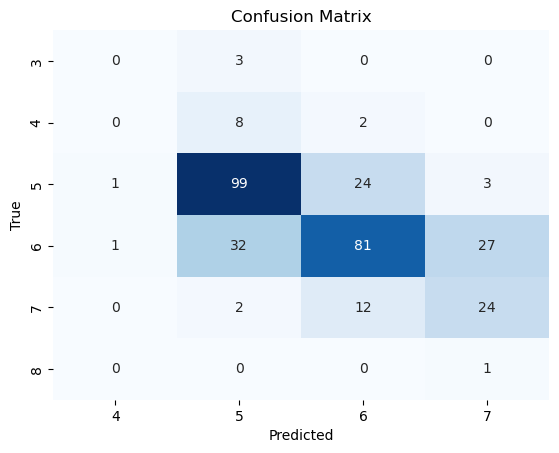

In [55]:
# Matriz de confusión
sns.heatmap(
    pd.crosstab(test[target], test["pred_"], rownames=["True"], colnames=["Predicted"]),
    annot=True, fmt="d", cmap="Blues", cbar=False
)
plt.title("Confusion Matrix")

In [57]:
(test["pred_"] == test[target]).mean()

0.6375

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>